In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
def get_dfs():
    modelnames = ['Watson', 'ACG', 'MACG']
    inference_types = ['EM','torch']
    init_methods = ['unif','++','dc','++_seg','dc_seg','Grassmann','Grassmann_seg']
    df_all = pd.DataFrame()
    for modelname in modelnames:
        for inference_type in inference_types:
            for init_method in init_methods:
                for ACG_rank in ['fullrank','lowrank']:
                    try:
                        df = pd.read_csv('../../data/results/torchvsEM_synthetic_results/Synthetic_'+inference_type+'_'+modelname+'_'+init_method+'.csv')
                    except:
                        continue
                    df = df[df['ACG_rank'] == ACG_rank]
                    df = df[df['HMM']==False]
                    if modelname == 'Watson':
                        df['mtype'] = inference_type+'_'+init_method
                    else:
                        df['mtype'] = inference_type+'_'+init_method+'_'+ACG_rank
                    df_all = pd.concat([df_all, df],ignore_index=True)
    #rename column "LR" to "Inference method"
    df_all = df_all.rename(columns={'LR':'Inference method'})
    #map values in this column from '0.0' to 'EM' and '1.0' to 'torch'
    df_all['Inference method'] = df_all['Inference method'].map({0:'EM',0.1:'torch'})
    df_all = df_all.rename(columns={'init_method':'Initialization method'})
    df_all['Initialization method'] = df_all['Initialization method'].map({'unif':'Uniform random','++':'Diametrical clustering ++','dc':'Diametrical clustering','++_seg':'Diametrical clustering ++ (segmented)','dc_seg':'Diametrical clustering (segmented)','Grassmann':'Grassmann','Grassmann_seg':'Grassmann (segmented)'})
    
    return df_all

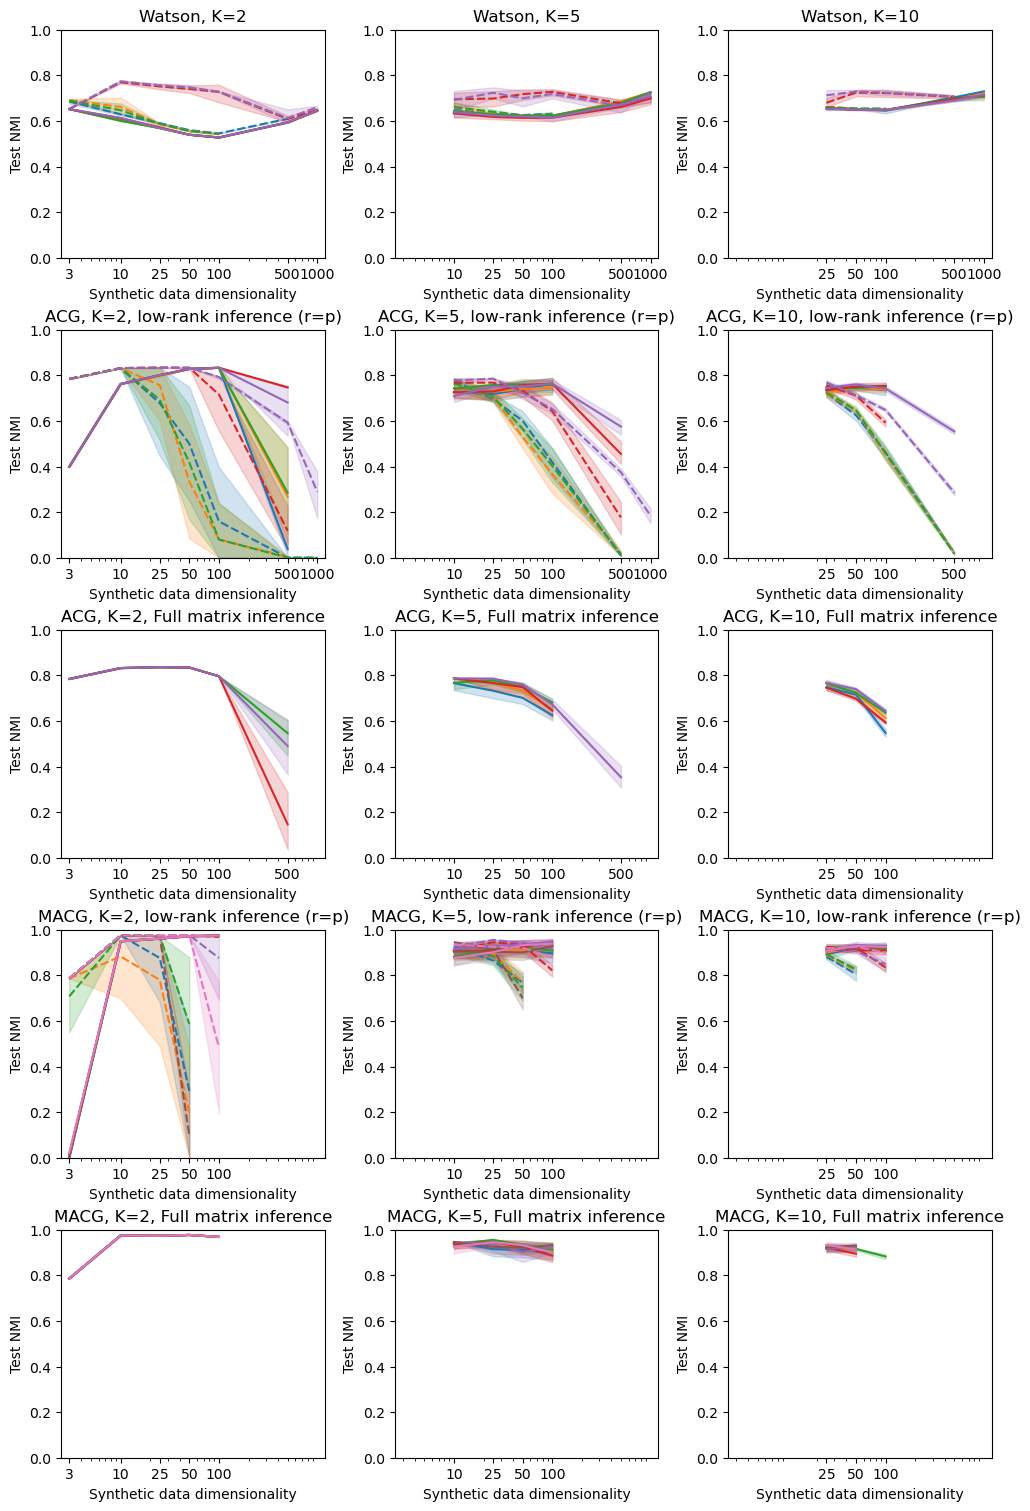

In [31]:
df_all = get_dfs()
modelnames = ['Watson', 'ACG', 'MACG']
fig,axs = plt.subplots(5,3,figsize=(10,15),layout='constrained')
for k,K in enumerate([2,5,10]):
    for m,modelname in enumerate(modelnames):
        for a,ACG_rank in enumerate(['lowrank','fullrank']):
            if ACG_rank=='fullrank' and modelname=='Watson':
                continue
            if m==2:
                m2=3
            else:
                m2=m
            df_tmp = df_all[df_all['K']==K]
            df_tmp = df_tmp[df_tmp['modelname']==modelname]
            df_tmp = df_tmp[df_tmp['ACG_rank']==ACG_rank]
            try:
                sns.lineplot(data=df_tmp, x='p', y='test_NMI', hue='Initialization method',style='Inference method', ax=axs[m2+a,k]) 
            except:
                continue
            if modelname=='Watson':
                axs[m2+a,k].set_title(modelname+', K='+str(K))
            elif ACG_rank=='fullrank':
                axs[m2+a,k].set_title(modelname+', K='+str(K)+', Full matrix inference')
            else:
                axs[m2+a,k].set_title(modelname+', K='+str(K)+', low-rank inference (r=p)')
            # axs[m2+a,k].set_title(modelname+', K='+str(K)+', '+ACG_rank)
            # axs[k,m].set_title(modelname+', K='+str(K))
            axs[m2+a,k].set_xlabel('Synthetic data dimensionality')
            axs[m2+a,k].set_ylabel('Test NMI')
            axs[m2+a,k].set_ylim(0,1)
            axs[m2+a,k].set_xlim(2.5,1200)
            axs[m2+a,k].set_xscale('log')
            axs[m2+a,k].set_xticks(df_tmp['p'].unique(),labels=df_tmp['p'].unique())
            # if not (m2+a==4 and k==2):
            axs[m2+a,k].get_legend().remove()
# plt.tight_layout()

(1.0, 1000.0)

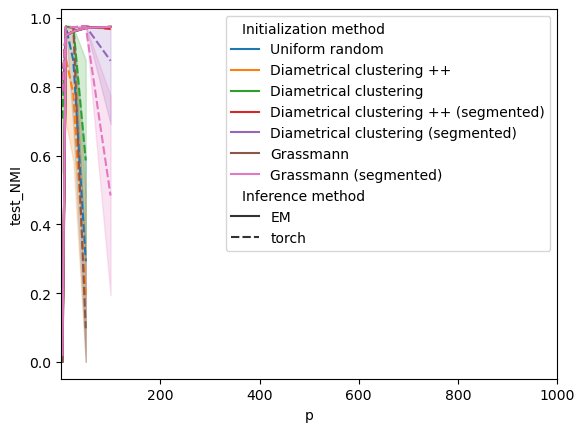

In [29]:
df_tmp = df_all[df_all['K']==2]
df_tmp = df_tmp[df_tmp['modelname']=='MACG']
df_tmp = df_tmp[df_tmp['ACG_rank']=='lowrank']
sns.lineplot(data=df_tmp, x='p', y='test_NMI', hue='Initialization method',style='Inference method') 
plt.xlim(1,1000)

In [14]:
sns.lineplot(df_tmp, x='LR',y='train_NMI')

ValueError: Could not interpret value `LR` for parameter `x`

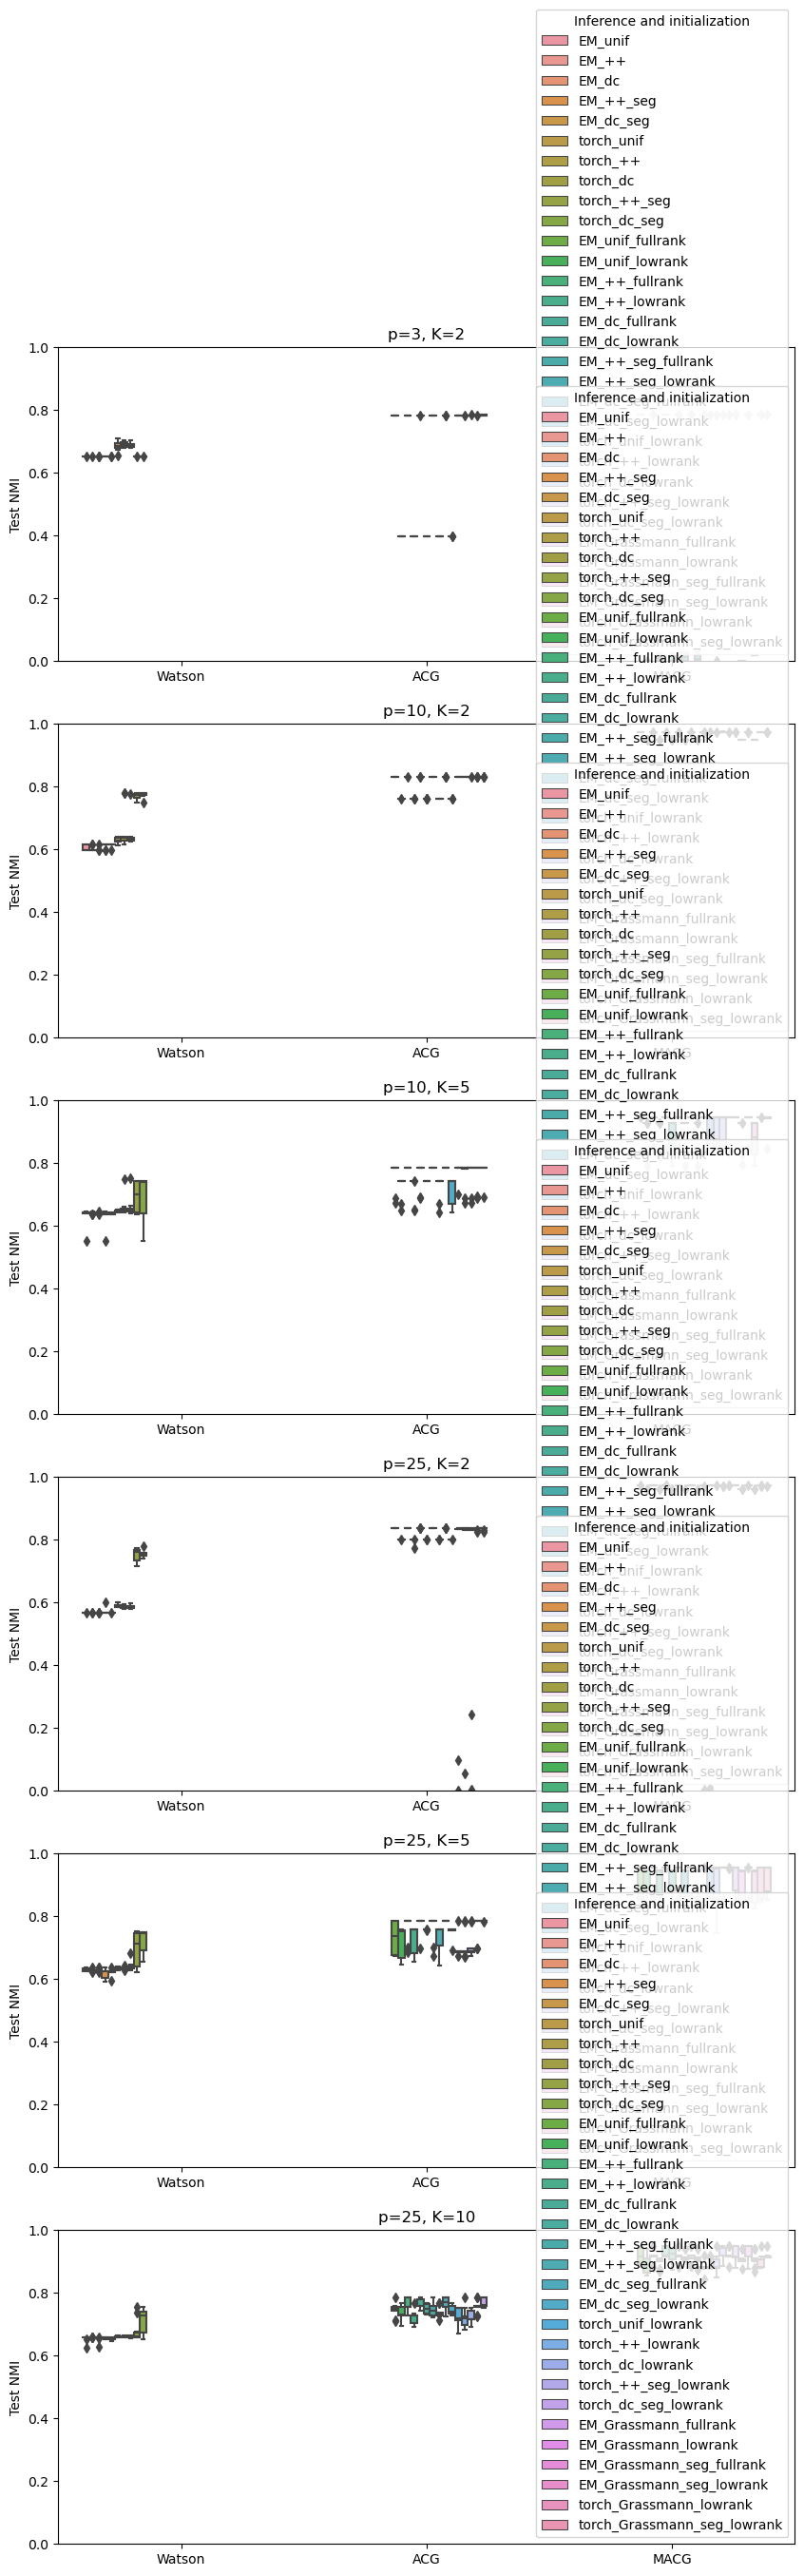

In [ ]:
plt.subplots(6,1,figsize=(10,30))
df_all = get_dfs()
# df_all = df_all[df_all['ACG_rank']=='lowrank']

i=1
for p in [3,10,25]:
    for K in [2,5,10]:
        if K>=p:
            continue
        plt.subplot(6,1,i)
        df = df_all[(df_all['p']==p) & (df_all['K']==K)]
        sns.boxplot(data=df, x='modelname', y='test_NMI', hue='mtype')
        plt.title('p='+str(p)+', K='+str(K))
        plt.ylabel('Test NMI')
        plt.xlabel('')
        plt.legend(title='Inference and initialization', loc='lower right')
        plt.ylim(0,1)
        i+=1
        